Real estate prediction using Linear Regression Model

In [1]:
#import all the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns


Mounted at /content/drive


In [2]:
#Read the csv file
file_path = '/content/drive/MyDrive/Machine Learning /Linear regression /UK_real_estate.csv'
df = pd.read_csv(file_path)
df.head()


,MYYYY_generation,is_virtual_tour,is_audio_tour,county,date_of_data_generation,is_premium_listing,latitude,publication_id,longitude,isNew,...,country,lagged_CPI,crime_rate,bank_rate,lagged_unemployment,lagged_arrears_over_2.5,volatility_value,num_bedrooms_categorical,num_bathrooms_categorical,nr_weeks
0,Jan-23,False,False,London,1/1/2023,False,51.426544,63551798,0.044076,False,...,England,9.2,87.0,3.5,3.7,0.742505,18.49,small,medium,1
1,Jan-23,False,False,London,1/1/2023,False,51.529293,63551793,-0.368535,False,...,England,9.2,87.0,3.5,3.7,0.742505,18.49,medium,medium,1
2,Jan-23,False,False,London,1/1/2023,False,51.533530,63551773,-0.361302,False,...,England,9.2,87.0,3.5,3.7,0.742505,18.49,medium,medium,1
3,Jan-23,False,False,London,1/1/2023,False,51.616340,63551725,-0.128762,False,...,England,9.2,87.0,3.5,3.7,0.742505,18.49,medium,medium,1
4,Jan-23,True,False,London,1/1/2023,False,51.468870,63551692,-0.126133,False,...,England,9.2,87.0,3.5,3.7,0.742505,18.49,medium,medium,1


Price is a dependent variable and others are independent variable. Based on other column we predict the price.

In [3]:
#Number of rows and column
df.shape

(84829, 28)

In [4]:
#See the distribution of real estate data across county
df.groupby('county')['county'].agg('count')

,county
county,
Aberdeenshire,1382
Belfast,343
Berkshire,1579
Bristol,4263
Buckinghamshire,3641
Cardiff,1920
Cornwall,2203
Derry,78
East Lothian,150


**DATA CLEANING**
* we drop unwanted rows
* change the column name
* Check if any column has null values

In [5]:
print(df.columns)

Index(['MYYYY_generation', 'is_virtual_tour', 'is_audio_tour', 'county',
       'date_of_data_generation', 'is_premium_listing', 'latitude',
       'publication_id', 'longitude', 'isNew', 'num_bathrooms.x',
       'num_bedrooms.x', 'num_floors', 'num_sofa', 'price', 'price_direction',
       'property_badge', 'property_type', 'country', 'lagged_CPI',
       'crime_rate', 'bank_rate', 'lagged_unemployment',
       'lagged_arrears_over_2.5', 'volatility_value',
       'num_bedrooms_categorical', 'num_bathrooms_categorical', 'nr_weeks'],
      dtype='object')


In [6]:
#drop columns not required
cols_to_drop = ['MYYYY_generation' ,'is_virtual_tour', 'is_audio_tour', 'date_of_data_generation', 'is_premium_listing',
                'latitude', 'publication_id', 'longitude', 'num_floors', 'num_sofa', 'price_direction',
                'property_badge', 'lagged_CPI', 'bank_rate', 'lagged_unemployment', 'lagged_arrears_over_2.5',
                'volatility_value','num_bedrooms_categorical', 'num_bathrooms_categorical', 'nr_weeks']
df = df.drop(cols_to_drop, axis='columns')
df.head()


,county,isNew,num_bathrooms.x,num_bedrooms.x,price,property_type,country,crime_rate
0,London,False,1,1,250000,apartment,England,87.0
1,London,False,1,3,550000,semi-detached house,England,87.0
2,London,False,1,2,525000,detached house,England,87.0
3,London,False,1,3,750000,detached house,England,87.0
4,London,False,2,3,800000,apartment,England,87.0


In [7]:
#Creating a new column with my preferred column name and dropping the existing column
#Just for fun and practice
df['num_bedrooms'] = df['num_bedrooms.x']
df.drop('num_bedrooms.x', axis='columns', inplace=True)
df.head()

,county,isNew,num_bathrooms.x,price,property_type,country,crime_rate,num_bedrooms
0,London,False,1,250000,apartment,England,87.0,1
1,London,False,1,550000,semi-detached house,England,87.0,3
2,London,False,1,525000,detached house,England,87.0,2
3,London,False,1,750000,detached house,England,87.0,3
4,London,False,2,800000,apartment,England,87.0,3


In [8]:
df['num_bathrooms'] = df['num_bathrooms.x']
df.drop('num_bathrooms.x', axis='columns', inplace=True)
df.head()

,county,isNew,price,property_type,country,crime_rate,num_bedrooms,num_bathrooms
0,London,False,250000,apartment,England,87.0,1,1
1,London,False,550000,semi-detached house,England,87.0,3,1
2,London,False,525000,detached house,England,87.0,2,1
3,London,False,750000,detached house,England,87.0,3,1
4,London,False,800000,apartment,England,87.0,3,2


In [9]:
#Check if there is any null columns
df.isnull().sum()

,0
county,0
isNew,0
price,0
property_type,0
country,0
crime_rate,0
num_bedrooms,0
num_bathrooms,0


In [10]:
#Observed crime rates of over 100.
'''
Can the rate be greater than 100?
Is that an outlier?
Do I need to scale or clean the data?
'''
df.crime_rate.unique()

array([ 87.  ,  91.  ,  88.  , 104.  , 106.  ,  52.4 ,  77.49,  75.16,
        92.  ,  70.  ,  43.  ,  64.  ,  85.  ,  59.  ,  68.  ,  75.  ,
        52.44])

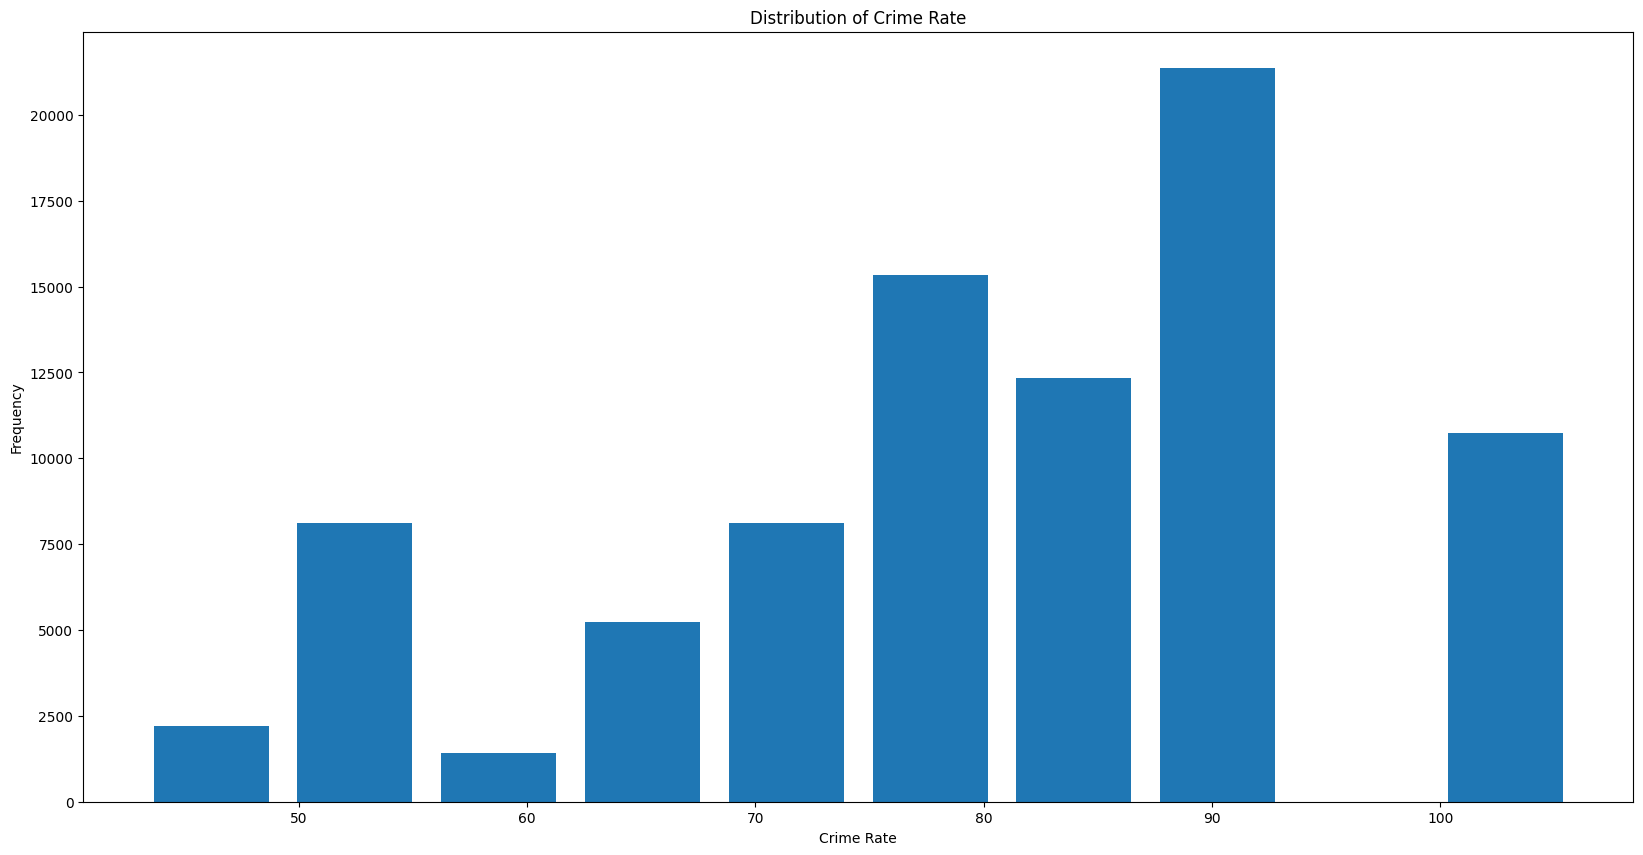

In [11]:
#Plot the data to find out
plt.hist(df.crime_rate, rwidth=0.8)
plt.title('Distribution of Crime Rate')
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.show()

Even though it says rates, according to the above histogram, we can interpret that the crime rate in the doc might be per 10,0000 people

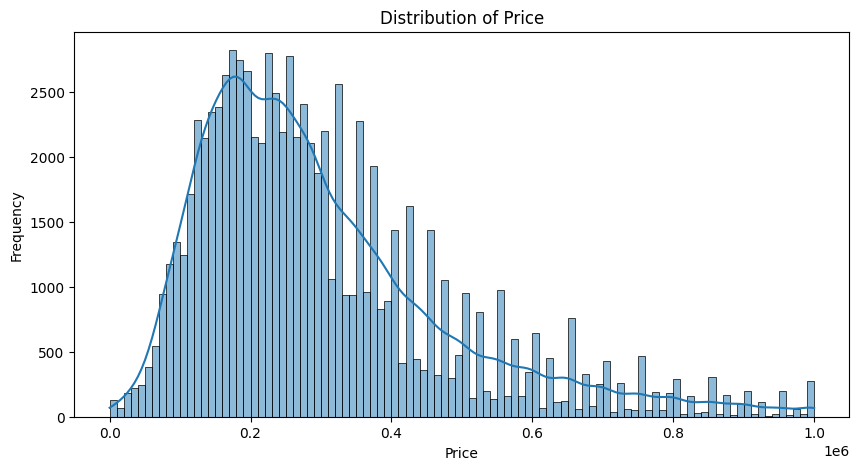

In [12]:
#Determine if there are any outlier for price. Plot the price column
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Price')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The data is concentrated towards left. Therefore, the histogram is right skewed. Most house prices are between £100k to £400k.
The histogram tail extends till 1 million, therefore suggests that there are some outliers which can affect model performance
*How can it affect model performance? *
* It inflates rmse, model evaluation becomes complicated

* Imagine a Linear Graph, we try to fit in the straight line across cluster of dots, however few dots are far off. To accomodate this the straight line tilts, but now misses majority of dots.

**We either remove these outliers or log transform it which means we compress these values so that they are not over powering.**

In [13]:
#If there are any rows with price of zero or negative we drop them
df = df[df['price']>0]

In [14]:
#There are outliers so we log transform price
df['log_price'] = np.log(df['price'])

/tmp/ipython-input-457397162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price'])


**Feature engineering to find if we have enough data points**

In [15]:
#how many counties do we have? More county, more difficult to handle
len(df.county.unique())

23

In [16]:
#does every county have enough data points?
df.county = df.county.apply(lambda x: x.strip())
county_stats = df.groupby('county')['county'].agg('count').sort_values(ascending=False)
county_stats

/tmp/ipython-input-406848054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.county = df.county.apply(lambda x: x.strip())


,county
county,
Nottingham,11361
Merseyside,10858
London,9654
West Midlands,9015
West Yorkshire,6459
Norfolk,4326
Edinburgh,4267
Bristol,4261
Hampshire,3794


In [17]:
df.county.unique()

array(['London', 'West Midlands', 'Merseyside', 'West Yorkshire',
       'Bristol', 'Glasgow', 'Nottingham', 'Edinburgh', 'Cardiff',
       'Tyne & Wear', 'Norfolk', 'Swansea', 'Cornwall', 'Buckinghamshire',
       'Hampshire', 'Kent', 'West Sussex', 'Berkshire', 'Lincolnshire',
       'Aberdeenshire', 'Belfast', 'East Lothian', 'Derry'], dtype=object)

In [18]:
#Any county with less than 1000 data point is named as other counties
other_counties = county_stats[county_stats <= 1000]
other_counties

,county
county,
Belfast,343
Lincolnshire,334
East Lothian,150
Derry,65


In [19]:
df.county = df.county.apply(lambda x: 'other_counties' if x in other_counties else x)
df.county.unique()

array(['London', 'West Midlands', 'Merseyside', 'West Yorkshire',
       'Bristol', 'Glasgow', 'Nottingham', 'Edinburgh', 'Cardiff',
       'Tyne & Wear', 'Norfolk', 'Swansea', 'Cornwall', 'Buckinghamshire',
       'Hampshire', 'Kent', 'West Sussex', 'Berkshire', 'other_counties',
       'Aberdeenshire'], dtype=object)

We consider two factors:
* How does number of bedrooms and bathrooms affect the price
* How does their combination(interaction influence price?

In [20]:
df['bedroom&bathroom'] = df['num_bedrooms'] *df['num_bathrooms']

In [21]:
df['num_bathrooms'].max()

4

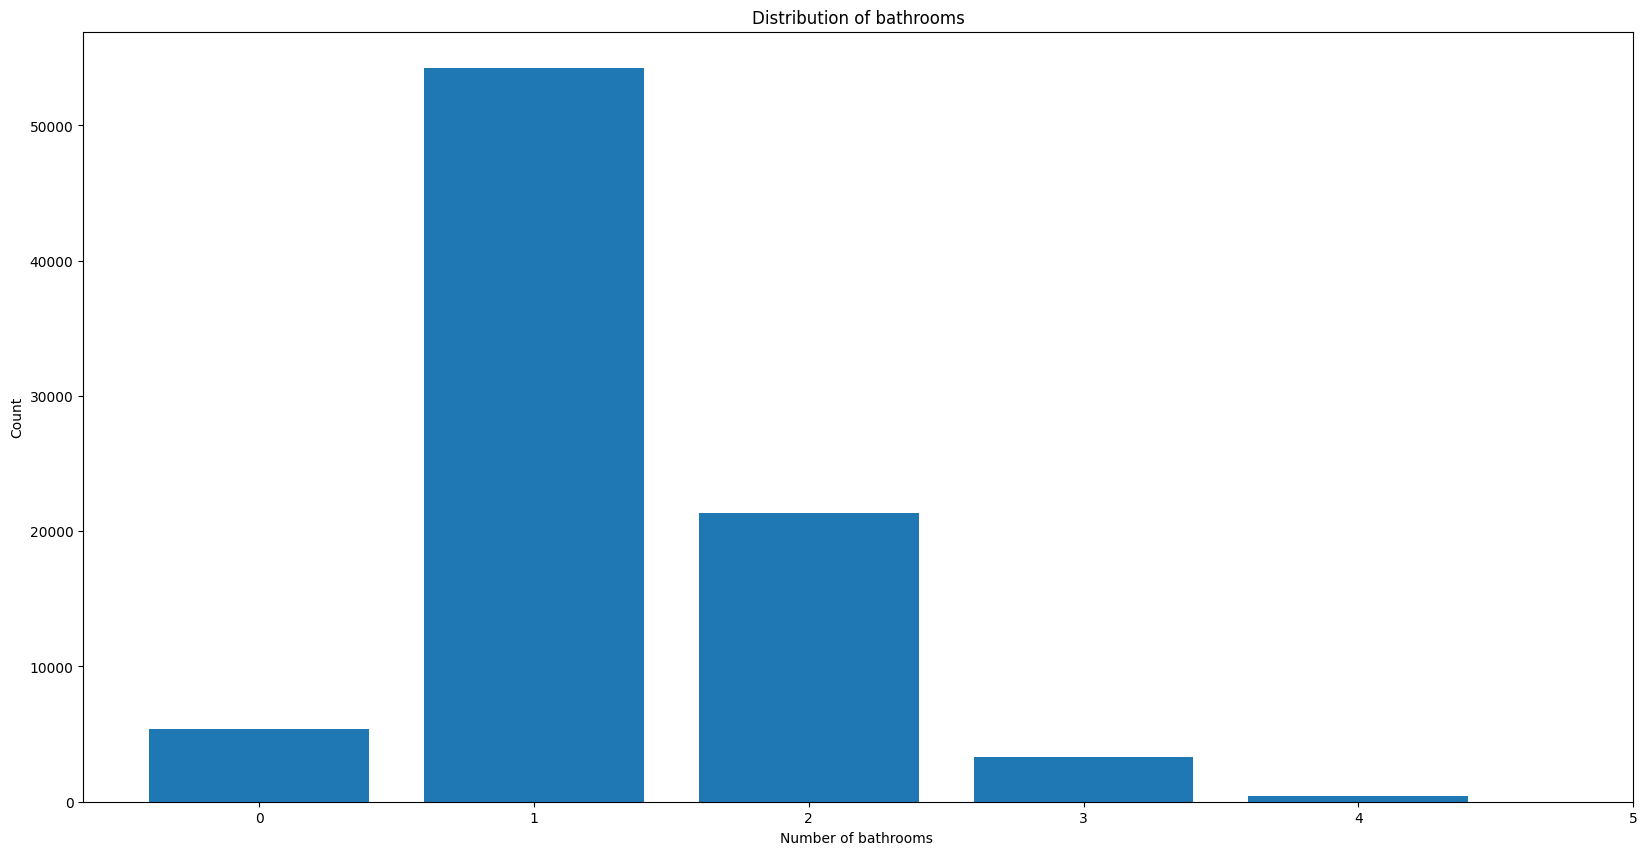

In [22]:
#Representing x axis as integer, we adjust bins.
bins = np.arange(df['num_bathrooms'].min(), df['num_bathrooms'].max() + 2)
plt.hist(df.num_bathrooms, bins=bins , rwidth=0.8, align='left')
plt.title('Distribution of bathrooms')
plt.xlabel("Number of bathrooms ")
plt.ylabel("Count")
plt.xticks(bins)
plt.show()

In [23]:
#We predict according to the real world scenario, Say if the number of bathroom is greater than number of bedroom +2 then we consider that an anamoly.
df[df.num_bathrooms> df.num_bedrooms+2]

,county,isNew,price,property_type,country,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom
1707,Nottingham,False,90000,detached house,England,77.49,1,4,11.407565,4
12029,West Midlands,False,150000,detached house,England,91.00,0,4,11.918391,0
27690,West Midlands,False,390000,detached house,England,91.00,0,3,12.873902,0
45340,West Midlands,False,550000,semi-detached house,England,91.00,0,4,13.217674,0
53182,West Midlands,False,130000,detached house,England,91.00,0,3,11.775290,0
53183,West Midlands,False,130000,semi-detached house,England,91.00,0,3,11.775290,0
84198,West Midlands,False,120000,semi-detached house,England,91.00,0,3,11.695247,0


In [24]:
df = df[df.num_bathrooms < df.num_bedrooms+2]
df.shape


(84711, 10)

In [25]:
df = df.drop(['country'],axis='columns')


Now, we convert text data to numerical value using one hot encoding or dummies method

In [26]:
dummies = pd.get_dummies(df.county).astype(int)
dummies

,Aberdeenshire,Berkshire,Bristol,Buckinghamshire,Cardiff,Cornwall,Edinburgh,Glasgow,Hampshire,Kent,London,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire,other_counties
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84824,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
84825,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
84826,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
84827,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
#We drop other counties to avoid dummy variable trap
df2 = pd.concat([df,dummies.drop('other_counties', axis='columns')], axis='columns')
df2.head()

,county,isNew,price,property_type,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom,Aberdeenshire,...,Kent,London,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire
0,London,False,250000,apartment,87.0,1,1,12.429216,1,0,...,0,1,0,0,0,0,0,0,0,0
1,London,False,550000,semi-detached house,87.0,3,1,13.217674,3,0,...,0,1,0,0,0,0,0,0,0,0
2,London,False,525000,detached house,87.0,2,1,13.171154,2,0,...,0,1,0,0,0,0,0,0,0,0
3,London,False,750000,detached house,87.0,3,1,13.527828,3,0,...,0,1,0,0,0,0,0,0,0,0
4,London,False,800000,apartment,87.0,3,2,13.592367,6,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
df2.drop('county', axis='columns', inplace=True)
df2.head()

,isNew,price,property_type,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom,Aberdeenshire,Berkshire,...,Kent,London,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire
0,False,250000,apartment,87.0,1,1,12.429216,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,False,550000,semi-detached house,87.0,3,1,13.217674,3,0,0,...,0,1,0,0,0,0,0,0,0,0
2,False,525000,detached house,87.0,2,1,13.171154,2,0,0,...,0,1,0,0,0,0,0,0,0,0
3,False,750000,detached house,87.0,3,1,13.527828,3,0,0,...,0,1,0,0,0,0,0,0,0,0
4,False,800000,apartment,87.0,3,2,13.592367,6,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
property_dummies = pd.get_dummies(df2.property_type)
property_dummies

,apartment,detached house,semi-detached house
0,True,False,False
1,False,False,True
2,False,True,False
3,False,True,False
4,True,False,False
...,...,...,...
84824,False,True,False
84825,False,False,True
84826,True,False,False
84827,True,False,False


In [30]:
#remove one column of dummy to avoid dummy variable trap
df2 = pd.concat([df2,property_dummies.drop('semi-detached house', axis='columns')], axis='columns')
df2.head()

,isNew,price,property_type,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom,Aberdeenshire,Berkshire,...,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire,apartment,detached house
0,False,250000,apartment,87.0,1,1,12.429216,1,0,0,...,0,0,0,0,0,0,0,0,True,False
1,False,550000,semi-detached house,87.0,3,1,13.217674,3,0,0,...,0,0,0,0,0,0,0,0,False,False
2,False,525000,detached house,87.0,2,1,13.171154,2,0,0,...,0,0,0,0,0,0,0,0,False,True
3,False,750000,detached house,87.0,3,1,13.527828,3,0,0,...,0,0,0,0,0,0,0,0,False,True
4,False,800000,apartment,87.0,3,2,13.592367,6,0,0,...,0,0,0,0,0,0,0,0,True,False


In [31]:
df2.drop('property_type', axis='columns', inplace=True)
df2.head()

,isNew,price,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom,Aberdeenshire,Berkshire,Bristol,...,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire,apartment,detached house
0,False,250000,87.0,1,1,12.429216,1,0,0,0,...,0,0,0,0,0,0,0,0,True,False
1,False,550000,87.0,3,1,13.217674,3,0,0,0,...,0,0,0,0,0,0,0,0,False,False
2,False,525000,87.0,2,1,13.171154,2,0,0,0,...,0,0,0,0,0,0,0,0,False,True
3,False,750000,87.0,3,1,13.527828,3,0,0,0,...,0,0,0,0,0,0,0,0,False,True
4,False,800000,87.0,3,2,13.592367,6,0,0,0,...,0,0,0,0,0,0,0,0,True,False


In [32]:
#convert boolean to numerical value
df2['isNew'] = df['isNew'].astype(int)


Train the data

In [33]:
#Split the data into X and Y
X = df2.drop(['price'], axis='columns')
X.head()


,isNew,crime_rate,num_bedrooms,num_bathrooms,log_price,bedroom&bathroom,Aberdeenshire,Berkshire,Bristol,Buckinghamshire,...,Merseyside,Norfolk,Nottingham,Swansea,Tyne & Wear,West Midlands,West Sussex,West Yorkshire,apartment,detached house
0,0,87.0,1,1,12.429216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
1,0,87.0,3,1,13.217674,3,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
2,0,87.0,2,1,13.171154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,False,True
3,0,87.0,3,1,13.527828,3,0,0,0,0,...,0,0,0,0,0,0,0,0,False,True
4,0,87.0,3,2,13.592367,6,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False


In [34]:
#Tried training the model both with log transforming the price and without it
#Not using log transform produced a significant improvement in r^2, rmse, mae
#Y = df2.log_price
Y = df2.price
Y.head()

,price
0,250000
1,550000
2,525000
3,750000
4,800000


Split the data into Training and Testing data for model training

In [35]:
from sklearn.model_selection import train_test_split
#80% of the data is training and 20% is testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [36]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
#Train the model
lr_clf.fit(X_train, Y_train)
#Coefficient of Linear Regression, the model explains ..% of the variation in house prices.
lr_clf.score(X_test, Y_test)

0.8744924836383978

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
#Predict the real estate price according to the model.
y_predict = lr_clf.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
rmse = np.sqrt(mse)
#r2_original = r2_score(actual_price,normal_price_predict)
#print("R² on original scale:", r2_original)
print("Root Mean Square: ", rmse)
print("Mean Absolute Error: ", mae)
print("Mean square Error: ", mse)

Root Mean Square:  63726.125597720114
Mean Absolute Error:  41497.37676315733
Mean square Error:  4061019083.6963987


Above we have splitted the data into training and testing just once.
In Cross validation:
* We split the data multiple times into train/test subsets
* Trains and evaluates the model on each split.

 **Do we get similar score for each split?**

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#Make 5 splits of training and testing data
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#calculate r^2 for each split
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.86602203, 0.87323015, 0.86789408, 0.86849738, 0.86843104])

Lets test which model works the best.
GridSearchCV is a general tool that can be used with any model(Lasso, Decision Tree or Linear Regression)

*Hyperparameter are the value at which the model achieves the best performance*

You give GridSearchCV:
* The model you want to use
* Grid of hyper parameter values
* The number of cross validation folds
Then, GridSearchCV trains and evaluates the model multiple times with every hyperparameter combination using cross validation.

**Laso**
We eliminate less important feature, helps preventing overfitting, hyperparameter is called alpha.

**Decision Tree Regressor**
Uses tree like structure to prefict continious output. Can overfit if tree grows too deep.
Hyperparameter is max_depth, min_samples_split


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

#We use grid search CV to find the best model
#create a function, algorithm contains dictionary
def find_best_model(X, Y):
  algorithms = {
      'linear_regression': {
          #First, it applies StandardScaler() to scale or normalise the data
          #It applies LinearRegression on scaled Data
          'model' : Pipeline([
              ('scaler', StandardScaler()),
              ('regressor', LinearRegression())
          ]),
          #Here it tells GridSearchCV that try the model with scaled and another with 'passthrough' which is unscaled data
          'params': {
              'scaler': [StandardScaler(), 'passthrough']
          }
        },
      'Lasso' : {
            'model' : Pipeline([
              ('scaler', StandardScaler()),
              ('lasso', Lasso(max_iter=10000))
          ]),
          #Here it tells the GridSearchCV to try the model with alpha value of one(keep most of the value), and alpha of two(shrink the values a bit)
          'params': {
              #alpha value determines the amount of shrinkage. Higher the value of alpha, greater the shrinkage
              'lasso__alpha': [1,2],
              'lasso__selection': ['random', 'cyclic']
          }
      },
      'decision-tree': {
          'model': DecisionTreeRegressor(),
          #params defines the type of hyper parameter we want to use
          'params': {
              'criterion': ['squared_error', 'friedman_mse'],
              'splitter': ['best', 'random'],
              #limits how deep the tree grows and limits how small the split can be
               'max_depth': [3, 5],
              'min_samples_split': [2, 5, 10]
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algorithms.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, Y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


results = find_best_model(X, Y)

Running the above code, we came to conclusion that decision tree models are the best, cause it gave us the score of 1.00 which seems to be like overfitting,
Overfitting: The model seems to have memorised the training data which may be because the data is very clean or the tree is too deep.
Therefore, we limited the max-depth and still got an excellent result of 0.998.

In [41]:
print(results.to_string(index=False))

            model  best_score                                                                                best_params
linear_regression    0.868815                                                               {'scaler': StandardScaler()}
            Lasso    0.868815                                          {'lasso__alpha': 2, 'lasso__selection': 'cyclic'}
    decision-tree    0.998480 {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [42]:
#Decision tree seems to be like over fitting, we try splitting the data and try minimum split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
best_tree = DecisionTreeRegressor(criterion='squared_error',max_depth=3, min_samples_split=2, splitter='best')
best_tree.fit(X_train, Y_train)
print("Test R² Score", best_tree.score(X_test, Y_test))
print("Train R² Score", best_tree.score(X_train, Y_train))


Test R² Score 0.9737772745789066
Train R² Score 0.9738840404194923


The R² score is still 0.998 therefore, we can conclude that the model is generalising the training data well.

In [43]:
#We predict the price using decision tree model
decision_tree_predict = best_tree.predict(X_test)
mse = mean_squared_error(Y_test, decision_tree_predict)
mae = mean_absolute_error(Y_test, decision_tree_predict)
rmse = np.sqrt(mse)
print("Root Mean Square: ", rmse)
print("Mean Square Error: ", mse)
print("Mean Absolute Error: ", mae)

Root Mean Square:  29128.73074878069
Mean Square Error:  848482955.0349617
Mean Absolute Error:  23865.667122205236


Therefore, we found out that Decision Tree is our best model. We can see that the predicted price is better than that with linear regression model done initially.
The rmse, mse and mae errors are improved significantly.
* MAE means the average of absolute error between actual and predicted price which is not too off for large dataset that I have used.
(*How far off the prediction are on average*)
* RMSE tells if outliers are affecting the model.

We can see than rmse and mae are relatively close which means there are no extreme outliers


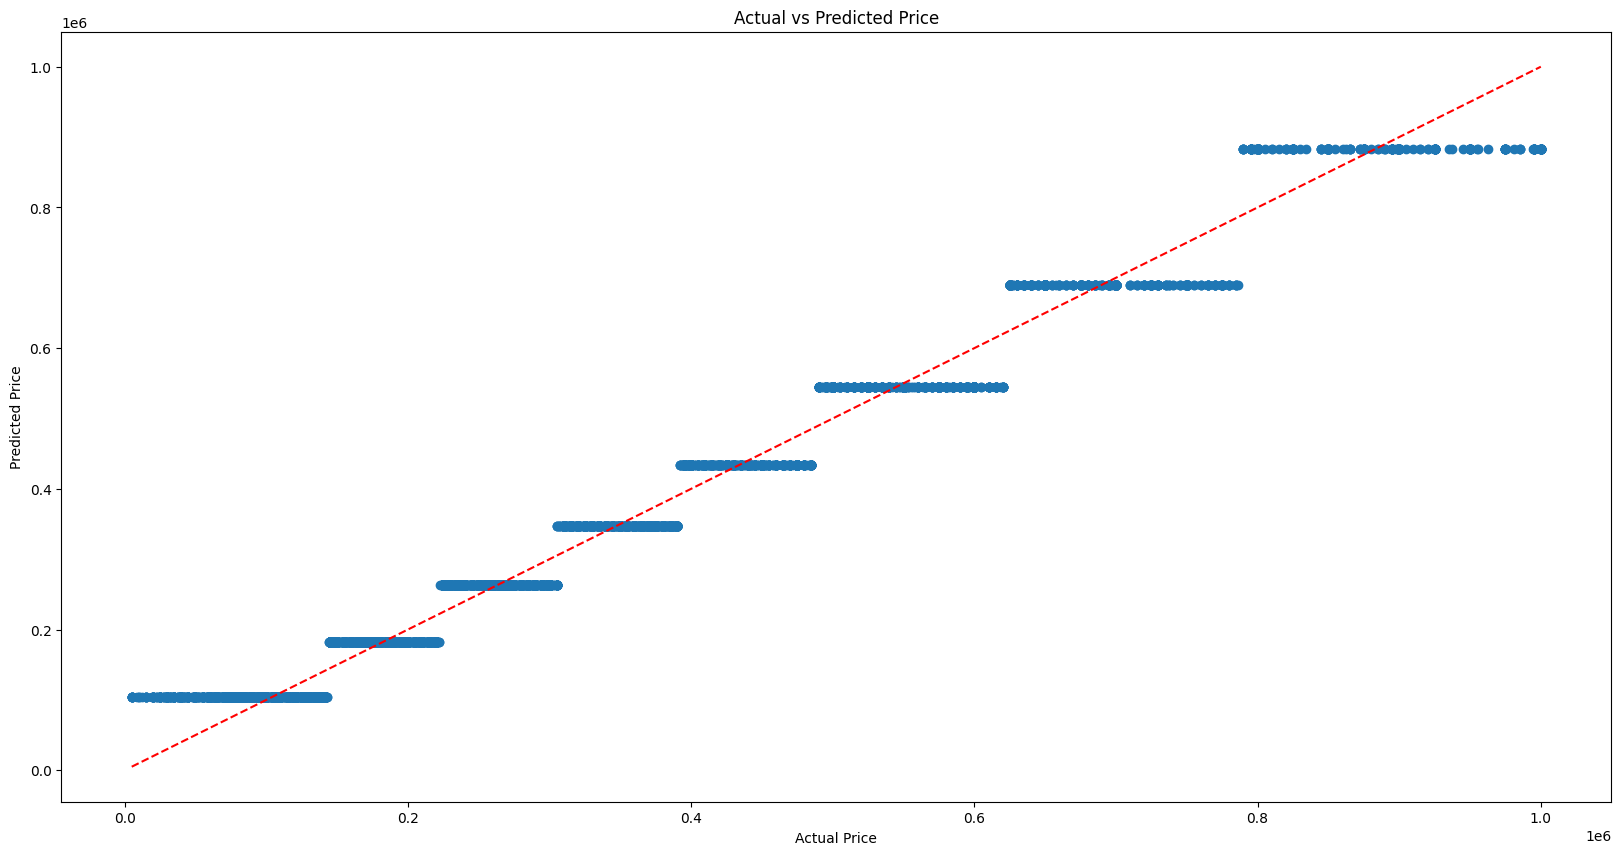

In [44]:
#Plot to see the predicted and actual price
plt.scatter(Y_test,decision_tree_predict)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()